In [1]:
import pandas as pd

# Load datasets
fraud_data = pd.read_csv(r'C:\Users\btulu\OneDrive - University of Florida\Class\UF_Class\Summer_2025\10Academy\week8\data\Fraud_Data.csv')
ip_country = pd.read_csv(r'C:\Users\btulu\OneDrive - University of Florida\Class\UF_Class\Summer_2025\10Academy\week8\data\IpAddress_to_Country.csv')
credit_card = pd.read_csv(r'C:\Users\btulu\OneDrive - University of Florida\Class\UF_Class\Summer_2025\10Academy\week8\data\creditcard.csv')

# Quick glance at the shape of each dataset
print("Fraud_Data shape:", fraud_data.shape)
print("IP_Country shape:", ip_country.shape)
print("Credit Card data shape:", credit_card.shape)

# Display first few rows of each dataset
display(fraud_data.head(5))
display(ip_country.head(5))
display(credit_card.head(5))


Fraud_Data shape: (151112, 11)
IP_Country shape: (138846, 3)
Credit Card data shape: (284807, 31)


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
# Check for missing values
print("Missing values in Fraud_Data:\n", fraud_data.isnull().sum())
print("Missing values in Credit Card data:\n", credit_card.isnull().sum())


Missing values in Fraud_Data:
 user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
Missing values in Credit Card data:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [3]:
# Remove any exact duplicate rows if present
duplicates_fraud = fraud_data.duplicated().sum()
duplicates_cc = credit_card.duplicated().sum()
print(f"Duplicate rows in Fraud_Data: {duplicates_fraud}")
print(f"Duplicate rows in Credit Card data: {duplicates_cc}")

# Convert time columns to datetime
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

# Confirm data types
print(fraud_data.dtypes)


Duplicate rows in Fraud_Data: 0
Duplicate rows in Credit Card data: 1081
user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object


In [4]:
# Class distribution in Fraud_Data
fraud_counts = fraud_data['class'].value_counts()
print(fraud_counts)

# Class distribution in Credit Card data
cc_counts = credit_card['Class'].value_counts()
print(cc_counts)


class
0    136961
1     14151
Name: count, dtype: int64
Class
0    284315
1       492
Name: count, dtype: int64


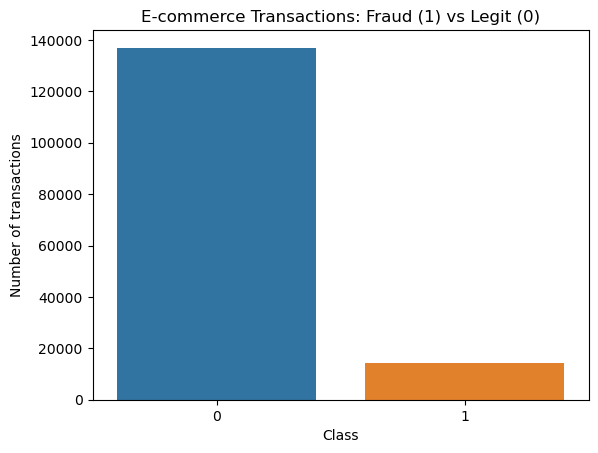

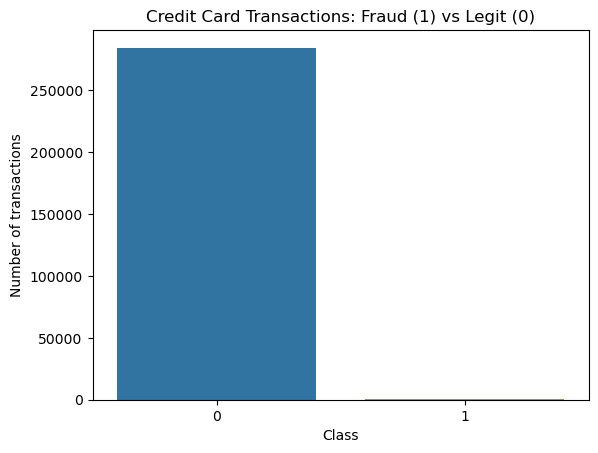

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for Fraud_Data class distribution
sns.countplot(x='class', data=fraud_data)
plt.title('E-commerce Transactions: Fraud (1) vs Legit (0)')
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.show()

# Bar plot for Credit Card class distribution
sns.countplot(x='Class', data=credit_card)
plt.title('Credit Card Transactions: Fraud (1) vs Legit (0)')
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.show()


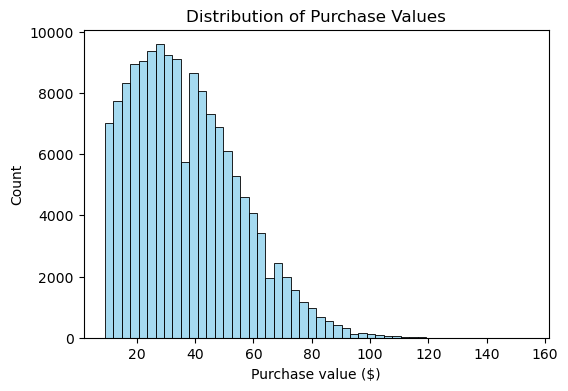

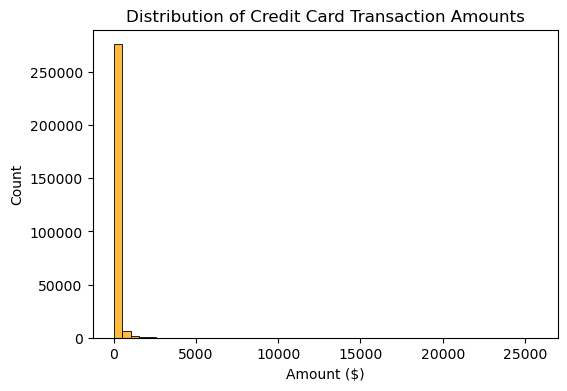

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: autodetected range of [-inf, 4.409783713850835] is not finite

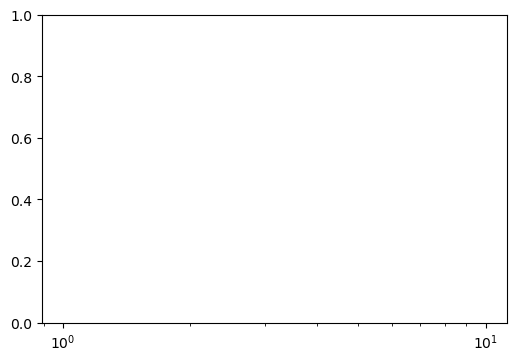

In [6]:
# Distribution of purchase values (Fraud_Data)
plt.figure(figsize=(6,4))
sns.histplot(fraud_data['purchase_value'], bins=50, color='skyblue')
plt.title('Distribution of Purchase Values')
plt.xlabel('Purchase value ($)')
plt.show()

# Distribution of transaction Amount (Credit Card)
plt.figure(figsize=(6,4))
sns.histplot(credit_card['Amount'], bins=50, color='orange')
plt.title('Distribution of Credit Card Transaction Amounts')
plt.xlabel('Amount ($)')
plt.show()

# Repeat plot for credit card amounts on log scale to show tail
plt.figure(figsize=(6,4))
sns.histplot(credit_card['Amount'], bins=50, log_scale=True, color='orange')
plt.title('Distribution of Credit Card Amounts (Log Scale)')
plt.xlabel('Amount ($, log scale)')
plt.show()


In [7]:
print(fraud_data['source'].value_counts())
print(fraud_data['browser'].value_counts())


source
SEO       60615
Ads       59881
Direct    30616
Name: count, dtype: int64
browser
Chrome     61432
IE         36727
Safari     24667
FireFox    24610
Opera       3676
Name: count, dtype: int64


TypeError: boxplot() got an unexpected keyword argument 'logy'

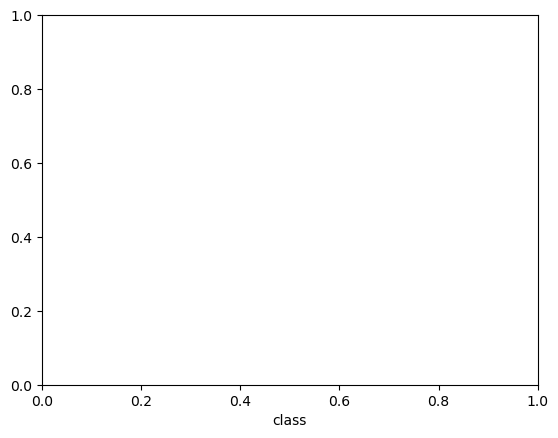

In [8]:
# Compare purchase_value by class
fraud_data.boxplot(column='purchase_value', by='class', logy=True)
plt.title('Purchase Value by Class (E-commerce)')
plt.suptitle('')
plt.xlabel('Class (0 = legit, 1 = fraud)')
plt.ylabel('Purchase Value (log scale)')
plt.show()

# Compare Amount by Class for credit card data
credit_card.boxplot(column='Amount', by='Class', showfliers=False)
plt.title('Transaction Amount by Class (Credit Card)')
plt.suptitle('')
plt.xlabel('Class (0 = legit, 1 = fraud)')
plt.ylabel('Amount ($)')
plt.show()


In [9]:
fraud_rate_by_source = fraud_data.groupby('source')['class'].mean()
fraud_rate_by_browser = fraud_data.groupby('browser')['class'].mean()
print(fraud_rate_by_source.sort_values(ascending=False))
print(fraud_rate_by_browser.sort_values(ascending=False))


source
Direct    0.105370
Ads       0.092066
SEO       0.089285
Name: class, dtype: float64
browser
Chrome     0.098792
FireFox    0.095165
Safari     0.090201
Opera      0.089227
IE         0.086775
Name: class, dtype: float64


In [10]:
# Sort datasets by IP for merge_asof
fraud_data = fraud_data.sort_values('ip_address')
ip_country = ip_country.sort_values('lower_bound_ip_address')

# Use merge_asof to merge IP to country based on the IP falling in the range.
fraud_data = pd.merge_asof(
    fraud_data, 
    ip_country, 
    left_on='ip_address', 
    right_on='lower_bound_ip_address', 
    direction='backward'
)
# Filter to only where ip_address <= upper_bound_ip_address
fraud_data = fraud_data[fraud_data['ip_address'] <= fraud_data['upper_bound_ip_address']]


In [11]:
print(fraud_data[['ip_address','country']].head(5))

       ip_address    country
634  1.677886e+07  Australia
635  1.684205e+07   Thailand
636  1.684366e+07      China
637  1.693873e+07      China
638  1.697198e+07   Thailand


In [12]:
fraud_rate_by_country = fraud_data.groupby('country')['class'].mean().sort_values(ascending=False)
print("Top 5 countries by fraud rate:\n", fraud_rate_by_country.head(5))


Top 5 countries by fraud rate:
 country
Turkmenistan             1.000000
Namibia                  0.434783
Sri Lanka                0.419355
Luxembourg               0.388889
Virgin Islands (U.S.)    0.333333
Name: class, dtype: float64


In [13]:
# Feature: time since signup (in hours)
fraud_data['time_since_signup'] = (fraud_data['purchase_time'] - fraud_data['signup_time']).dt.total_seconds() / 3600.0


In [14]:
fraud_data['hour_of_day'] = fraud_data['purchase_time'].dt.hour
fraud_data['day_of_week'] = fraud_data['purchase_time'].dt.dayofweek  # Monday=0, Sunday=6


In [15]:
# Number of prior transactions by the same user (up to current transaction time)
fraud_data = fraud_data.sort_values(['user_id','purchase_time'])
fraud_data['user_txn_count'] = fraud_data.groupby('user_id').cumcount()  # number of previous transactions

# Total transactions by device (could just do a groupby count per device_id)
device_counts = fraud_data.groupby('device_id')['user_id'].transform('count')
fraud_data['device_txn_count'] = device_counts


In [16]:
print(fraud_data[['user_id','purchase_time','user_txn_count','device_txn_count','time_since_signup','hour_of_day','day_of_week']].head(10))


        user_id       purchase_time  user_txn_count  device_txn_count  \
31545         2 2015-02-21 10:03:37               0                 1   
97542         4 2015-09-26 21:32:16               0                 1   
12873         8 2015-08-13 11:53:07               0                 1   
104500       12 2015-03-04 20:56:37               0                 1   
21011        16 2015-03-12 12:46:23               0                 1   
127701       18 2015-10-23 00:18:57               0                 1   
42090        33 2015-10-28 18:12:41               0                 1   
109627       39 2015-01-08 18:13:26               0                13   
58534        41 2015-03-23 10:10:08               0                 1   
124125       47 2015-04-04 09:08:26               0                 1   

        time_since_signup  hour_of_day  day_of_week  
31545          990.273333           10            5  
97542         2788.855278           21            5  
12873         1852.000278         

In [18]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for imblearn from https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/d8/0d/c3bfccc5d460eec8ff56889802aa88f5d07280d5282b307a74558e6edc44/imbalanced_learn-0.12.4-py3-none-any.whl.metadata
   ---------------------------------------- 258.3/258.3 kB 2.3 MB/s eta 0:00:00


In [23]:
# Remove datetime columns from X before train-test split
datetime_cols = X.select_dtypes(include=['datetime', 'datetime64[ns]']).columns
X = X.drop(columns=datetime_cols)

# Optionally, drop any columns that are not numeric (e.g., object type)
non_numeric_cols = X.select_dtypes(include=['object']).columns
X = X.drop(columns=non_numeric_cols)


In [24]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# After removing datetimes/non-numerics
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:\n", pd.Series(y_train_res).value_counts())


Class distribution after SMOTE:
 class
0    93502
1    93502
Name: count, dtype: int64


In [25]:
from sklearn.preprocessing import StandardScaler

# Define numerical features to scale (example for fraud_data)
num_features = ['purchase_value','age','time_since_signup']
scaler = StandardScaler()
fraud_data[num_features] = scaler.fit_transform(fraud_data[num_features])

# For credit_card data, scale the Amount (the V1-V28 are already PCA components which may be centered)
credit_card['Amount'] = scaler.fit_transform(credit_card[['Amount']])


In [27]:
print(fraud_data.columns.tolist())


['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'device_id', 'age', 'ip_address', 'class', 'lower_bound_ip_address', 'upper_bound_ip_address', 'time_since_signup', 'hour_of_day', 'day_of_week', 'user_txn_count', 'device_txn_count', 'source_Direct', 'source_SEO', 'browser_FireFox', 'browser_IE', 'browser_Opera', 'browser_Safari', 'sex_M', 'country_Albania', 'country_Algeria', 'country_Angola', 'country_Antigua and Barbuda', 'country_Argentina', 'country_Armenia', 'country_Australia', 'country_Austria', 'country_Azerbaijan', 'country_Bahamas', 'country_Bahrain', 'country_Bangladesh', 'country_Barbados', 'country_Belarus', 'country_Belgium', 'country_Belize', 'country_Benin', 'country_Bermuda', 'country_Bhutan', 'country_Bolivia', 'country_Bonaire; Sint Eustatius; Saba', 'country_Bosnia and Herzegowina', 'country_Botswana', 'country_Brazil', 'country_British Indian Ocean Territory', 'country_Brunei Darussalam', 'country_Bulgaria', 'country_Burkina Faso', 'country_Burundi', '

In [28]:
intended_cols = ['source', 'browser', 'sex', 'country']
existing_cols = [col for col in intended_cols if col in fraud_data.columns]
print("Columns available for encoding:", existing_cols)


Columns available for encoding: []


In [29]:
for col in ['source', 'browser', 'sex', 'country']:
    if col in fraud_data.columns:
        fraud_data = pd.get_dummies(fraud_data, columns=[col], drop_first=True)
